In [1]:
import pandas as pd
import pickle
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Read the data

In [2]:
y = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')['SAB']

# Read the model

In [3]:
model = pickle.load(open('../model_output/SAB_forecast.pkl', 'rb'))

Importing plotly failed. Interactive plots will not work.


# Forecast

In [4]:
y_pred, y_pred_ints, preds, pred_ints = model.update(new_y=y,
                                                     mode='best_horizon',
                                                     ret_underlying=True)

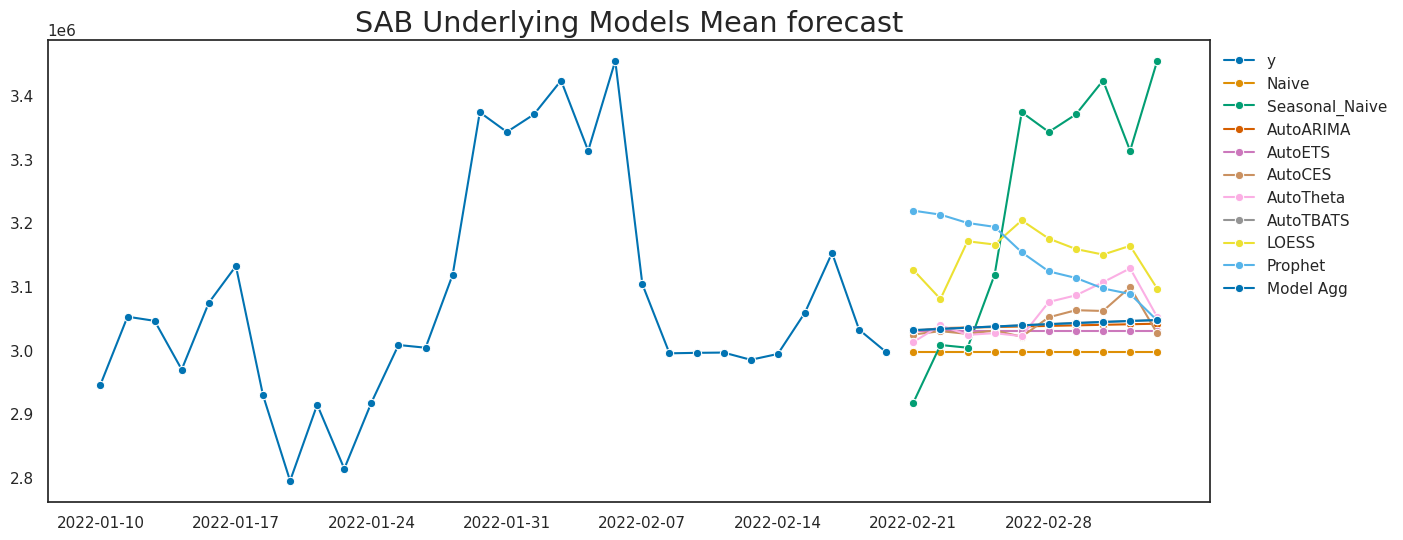

In [5]:
f, ax = model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     title = 'SAB Underlying Models Mean forecast',
                     y_pred_interval = None) 

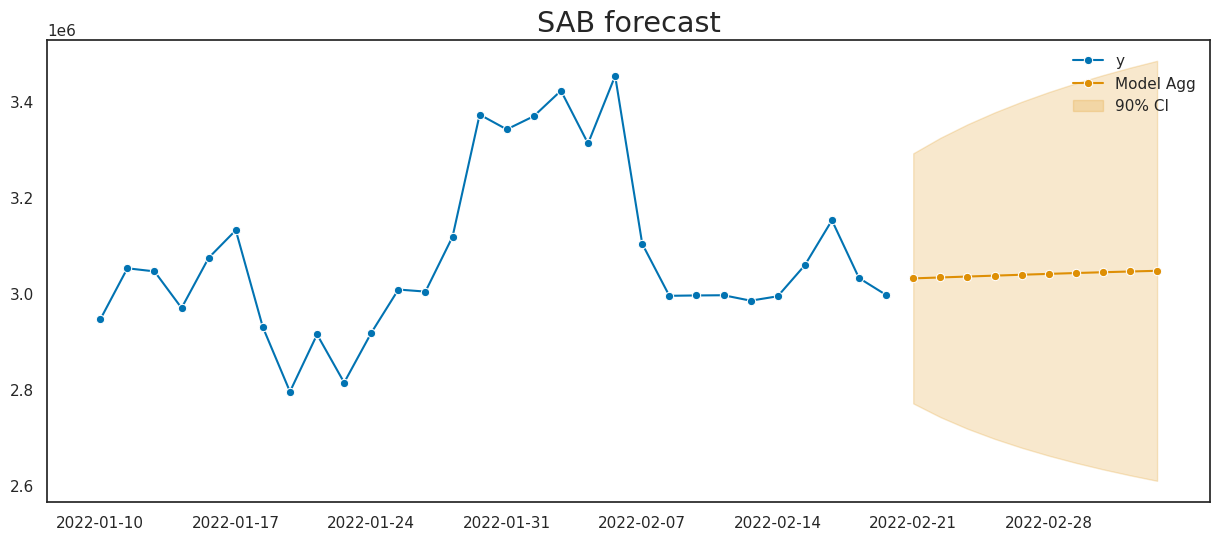

In [8]:
f, ax = model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     title = 'SAB forecast',
                     y_pred_interval = y_pred_ints) 
f.savefig(f'forecast_output/SAB_forecast_{today}.png')
f.show()

## Save forecast output

In [7]:
# output the predictions and prediction intervals from the model and the underlying model in excel sheet
with pd.ExcelWriter(f'forecast_output/SAB_prediction_{today}.xlsx') as writer:
    y_pred.rename('Model Agg').to_frame().to_excel(writer, sheet_name='mean_forecast', index=True)
    y_pred_ints.to_excel(writer, sheet_name='prediction_intervals', index=True)
    preds.to_excel(writer, sheet_name='underlying_models_forecasts', index=True)
    pred_ints.to_excel(writer, sheet_name='underlying_models_CI', index=True)